In [ ]:
# ********* GENERAL **********

Location of website in question

https://petition.parliament.uk/petitions/235821

In [ ]:
# TIME STAMP THE DOWNLOAD OF THE JSON DATA so you can compare them

# Monday 05.23 -- 1807 sigs
# Monday 14.12 -- 2045 sigs
# Tuesday 10.24 -- 2509 sigs

JAVASCRIPT OBJECT NOTATION

json.load()
-- load from a file

json.loads()
-- load from a string - that's the S in loads

json.dump()
-- output the file

json.dumps
-- output the file as a string

In [1]:
import json
import pandas as pd
from pandas.io.json import json_normalize #package for flattening json in pandas df

import matplotlib as plt
%matplotlib inline


In [2]:
# IMPORTS FOR PLOTLY

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [3]:
json_file = open ("/Users/aidanairuser/Desktop/petition_14.13_04022019.json", "r", encoding = "utf-8")

In [4]:
pet = json.load (json_file)

In [5]:
json_file.close()

In [6]:
pet

{'links': {'self': 'https://petition.parliament.uk/petitions/235821.json'},
 'data': {'type': 'petition',
  'id': 235821,
  'attributes': {'action': 'Offer the Republic of Ireland full UK membership so they can rejoin the Union.',
   'background': 'The RoI left our Union in 1922 after 121 years of being part of the family. We should now ask them to reconsider their position within both the UK & EU as a way of solving the current impasse over the Irish border issue that is holding up the Withdrawal Agreement. Britain & Ireland stronger together',
   'additional_details': '',
   'state': 'open',
   'signature_count': 2045,
   'created_at': '2018-12-21T15:15:33.380Z',
   'updated_at': '2019-02-04T13:12:01.236Z',
   'rejected_at': None,
   'opened_at': '2019-01-09T10:43:41.649Z',
   'closed_at': None,
   'moderation_threshold_reached_at': '2018-12-21T15:36:52.455Z',
   'response_threshold_reached_at': None,
   'government_response_at': None,
   'debate_threshold_reached_at': None,
   'sche

In [7]:
type (pet)

# so since it's a dictionary you access the info by key....

dict

In [8]:
# the main top level branch is 'data'

pet["data"]

{'type': 'petition',
 'id': 235821,
 'attributes': {'action': 'Offer the Republic of Ireland full UK membership so they can rejoin the Union.',
  'background': 'The RoI left our Union in 1922 after 121 years of being part of the family. We should now ask them to reconsider their position within both the UK & EU as a way of solving the current impasse over the Irish border issue that is holding up the Withdrawal Agreement. Britain & Ireland stronger together',
  'additional_details': '',
  'state': 'open',
  'signature_count': 2045,
  'created_at': '2018-12-21T15:15:33.380Z',
  'updated_at': '2019-02-04T13:12:01.236Z',
  'rejected_at': None,
  'opened_at': '2019-01-09T10:43:41.649Z',
  'closed_at': None,
  'moderation_threshold_reached_at': '2018-12-21T15:36:52.455Z',
  'response_threshold_reached_at': None,
  'government_response_at': None,
  'debate_threshold_reached_at': None,
  'scheduled_debate_date': None,
  'debate_outcome_at': None,
  'creator_name': 'Scott Packer',
  'rejection

In [9]:
# the other top level branch (of 2)

pet ["links"]

{'self': 'https://petition.parliament.uk/petitions/235821.json'}

In [10]:
# how does a dictionary work again?

thisdict =	{
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}
x = thisdict["model"]
x

'Mustang'

In [ ]:
# ***** COUNTRIES WHERE PEOPLE ARE SIGNING *******

In [11]:
#pull out part of the PET dictionary: drill down into PET/DATA/ATTRIBUTES to get to 
# SIGNATURES_BY_COUNTRY

sign = pet["data"]['attributes']['signatures_by_country']
sign

[{'name': 'Australia', 'code': 'AU', 'signature_count': 6},
 {'name': 'Canada', 'code': 'CA', 'signature_count': 7},
 {'name': 'Denmark', 'code': 'DK', 'signature_count': 1},
 {'name': 'Germany', 'code': 'DE', 'signature_count': 2},
 {'name': 'Gibraltar', 'code': 'GI', 'signature_count': 1},
 {'name': 'Guernsey', 'code': 'GG', 'signature_count': 1},
 {'name': 'Hong Kong', 'code': 'HK', 'signature_count': 1},
 {'name': 'Hungary', 'code': 'HU', 'signature_count': 1},
 {'name': 'Ireland', 'code': 'IE', 'signature_count': 59},
 {'name': 'Isle of Man', 'code': 'IM', 'signature_count': 2},
 {'name': 'Italy', 'code': 'IT', 'signature_count': 1},
 {'name': 'New Zealand', 'code': 'NZ', 'signature_count': 4},
 {'name': 'Spain', 'code': 'ES', 'signature_count': 1},
 {'name': 'Sri Lanka', 'code': 'LK', 'signature_count': 1},
 {'name': 'Ukraine', 'code': 'UA', 'signature_count': 1},
 {'name': 'United Arab Emirates', 'code': 'AE', 'signature_count': 1},
 {'name': 'United Kingdom', 'code': 'GB', 'sig

In [12]:
# build a df from this info

sig_df = pd.DataFrame.from_dict(sign)

In [13]:
sig_df.head(4)

,code,name,signature_count
0,AU,Australia,6
1,CA,Canada,7
2,DK,Denmark,1
3,DE,Germany,2


In [14]:
# check the total number of entries against the petition figure - 2045 on Monday afternoon

sig_df.signature_count.sum()

2045

In [15]:
# signatures from how many countries?

sig_df.name.count()

18

In [16]:
# alternatively....

sig_df.shape

(18, 3)

In [17]:
sig_df = sig_df[['name', 'signature_count', 'code']]

In [18]:
sig_df.rename(columns = {'signature_count':'signatures'}, inplace = True)
sig_df.rename(columns = {'name':'country'}, inplace = True)

In [19]:
sig_df.sort_values(by = "signatures", ascending = False)

,country,signatures,code
16,United Kingdom,1951,GB
8,Ireland,59,IE
1,Canada,7,CA
0,Australia,6,AU
11,New Zealand,4,NZ
17,United States,4,US
3,Germany,2,DE
9,Isle of Man,2,IM
6,Hong Kong,1,HK
7,Hungary,1,HU


In [20]:
sig_df2 = sig_df

In [21]:
sig_df2.set_index("country",drop=True,inplace=True)

In [22]:
# DROP ONE COLUMN 

sig_df2.drop('code', axis=1, inplace=True)


In [23]:
sig_df2.sort_values(by = "signatures", ascending = False).head(10)


,signatures
country,
United Kingdom,1951
Ireland,59
Canada,7
Australia,6
New Zealand,4
United States,4
Germany,2
Isle of Man,2
Hong Kong,1


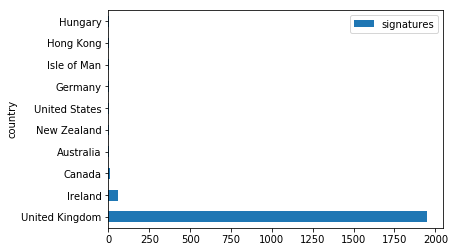

In [24]:
sig_df2.sort_values(by = "signatures", ascending = False).head(10).plot(kind = 'barh')


In [ ]:
# ****** MOVING ONTO CONSTITUENCIES *********

In [25]:
# Drilling down to one top branch (data) then down to attributes then to sigs

const = pet["data"]['attributes']['signatures_by_constituency']
const

[{'name': 'Edinburgh East',
  'ons_code': 'S14000022',
  'mp': 'Tommy Sheppard MP',
  'signature_count': 2},
 {'name': 'Edinburgh North and Leith',
  'ons_code': 'S14000023',
  'mp': 'Deidre Brock MP',
  'signature_count': 2},
 {'name': 'Edinburgh South',
  'ons_code': 'S14000024',
  'mp': 'Ian Murray MP',
  'signature_count': 2},
 {'name': 'Edinburgh South West',
  'ons_code': 'S14000025',
  'mp': 'Joanna Cherry QC MP',
  'signature_count': 4},
 {'name': 'Edinburgh West',
  'ons_code': 'S14000026',
  'mp': 'Christine Jardine MP',
  'signature_count': 2},
 {'name': 'Banff and Buchan',
  'ons_code': 'S14000007',
  'mp': 'David Duguid MP',
  'signature_count': 2},
 {'name': 'Falkirk',
  'ons_code': 'S14000028',
  'mp': 'John McNally MP',
  'signature_count': 2},
 {'name': 'Glasgow Central',
  'ons_code': 'S14000029',
  'mp': 'Alison Thewliss MP',
  'signature_count': 3},
 {'name': 'Glasgow East',
  'ons_code': 'S14000030',
  'mp': 'David Linden MP',
  'signature_count': 3},
 {'name': 'Gl

In [26]:
con_df = pd.DataFrame.from_dict(const)

In [27]:
con_df = con_df[['name', 'signature_count', 'ons_code', 'mp']]

In [28]:
con_df.rename(columns = {'signature_count':'signatures'}, inplace = True)
con_df.rename(columns = {'name':'Constituency'}, inplace = True)

In [29]:
con_df

,Constituency,signatures,ons_code,mp
0,Edinburgh East,2,S14000022,Tommy Sheppard MP
1,Edinburgh North and Leith,2,S14000023,Deidre Brock MP
2,Edinburgh South,2,S14000024,Ian Murray MP
3,Edinburgh South West,4,S14000025,Joanna Cherry QC MP
4,Edinburgh West,2,S14000026,Christine Jardine MP
5,Banff and Buchan,2,S14000007,David Duguid MP
6,Falkirk,2,S14000028,John McNally MP
7,Glasgow Central,3,S14000029,Alison Thewliss MP
8,Glasgow East,3,S14000030,David Linden MP
9,Glasgow North,3,S14000031,Patrick Grady MP


In [30]:
con_df.Constituency.shape

# so that's 585 constituencies out of the 650

(585,)

In [31]:
con_df.Constituency.count()

# that's out of 650 constituencies

585

In [32]:
con_df.signatures.mean()

# with an average of just over three people signing per constituency.
# since the only requirement is to be British or UK-resident these numbers are out of 
# a very large pool.

3.282051282051282

In [33]:
585 * 3.28

1918.8

In [34]:
con_df.signatures.value_counts().head()

# here we see there were 156 constituencies where 2 people signed,
# 130 where 3 people signed, etc.


2    156
3    139
1    120
4     73
5     50
Name: signatures, dtype: int64

In [35]:
pulled = con_df[['Constituency', 'signatures']]

checking_df = pd.DataFrame(pulled)


In [36]:
checking_df.signatures.sum()

1920

In [37]:
con_df.sort_values(by = "signatures", ascending = False)

,Constituency,signatures,ons_code,mp
62,Belfast East,30,N06000001,Gavin Robinson MP
193,East Antrim,28,N06000005,Rt Hon Sammy Wilson MP
279,Lagan Valley,25,N06000009,Rt Hon Sir Jeffrey M. Donaldson MP
443,South Antrim,21,N06000014,Paul Girvan MP
485,Strangford,20,N06000016,Jim Shannon MP
63,Belfast North,20,N06000002,Rt Hon Nigel Dodds MP
153,Cities of London and Westminster,19,E14000639,Rt Hon Mark Field MP
545,West Tyrone,19,N06000018,Órfhlaith Begley MP
350,North Down,19,N06000013,Lady Hermon MP
343,Newry and Armagh,17,N06000011,Mickey Brady MP


In [38]:
con_df.sort_values(by = "signatures", ascending = False).head(20)

,Constituency,signatures,ons_code,mp
62,Belfast East,30,N06000001,Gavin Robinson MP
193,East Antrim,28,N06000005,Rt Hon Sammy Wilson MP
279,Lagan Valley,25,N06000009,Rt Hon Sir Jeffrey M. Donaldson MP
443,South Antrim,21,N06000014,Paul Girvan MP
485,Strangford,20,N06000016,Jim Shannon MP
63,Belfast North,20,N06000002,Rt Hon Nigel Dodds MP
153,Cities of London and Westminster,19,E14000639,Rt Hon Mark Field MP
545,West Tyrone,19,N06000018,Órfhlaith Begley MP
350,North Down,19,N06000013,Lady Hermon MP
343,Newry and Armagh,17,N06000011,Mickey Brady MP


List of NI constituencies for info

Belfast East
Belfast North
Belfast South
Belfast West
East Antrim
East Londonderry
Fermanagh & South Tyrone
Foyle
Lagan Valley
Mid Ulster
Newry & Armagh
North Antrim
North Down
South Antrim
South Down
Strangford
Upper Bann
West Tyrone

In [39]:
con_df2 = con_df

In [40]:
# can't rerun this code, obviously

con_df2.set_index("Constituency",drop=True,inplace=True)


In [41]:
con_df2.sort_values(by = "signatures", ascending = False).head(20)

,signatures,ons_code,mp
Constituency,,,
Belfast East,30,N06000001,Gavin Robinson MP
East Antrim,28,N06000005,Rt Hon Sammy Wilson MP
Lagan Valley,25,N06000009,Rt Hon Sir Jeffrey M. Donaldson MP
South Antrim,21,N06000014,Paul Girvan MP
Strangford,20,N06000016,Jim Shannon MP
Belfast North,20,N06000002,Rt Hon Nigel Dodds MP
Cities of London and Westminster,19,E14000639,Rt Hon Mark Field MP
West Tyrone,19,N06000018,Órfhlaith Begley MP
North Down,19,N06000013,Lady Hermon MP


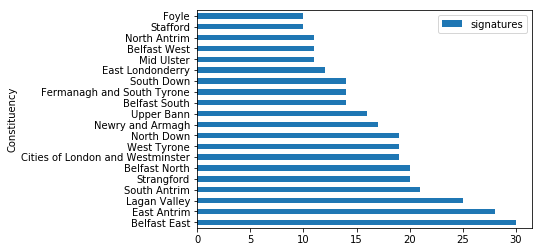

In [42]:
con_df2.sort_values(by = "signatures", ascending = False).head(20).plot(kind = 'barh')

# if you plot this now it will have the highest bars on the bottom, not the top

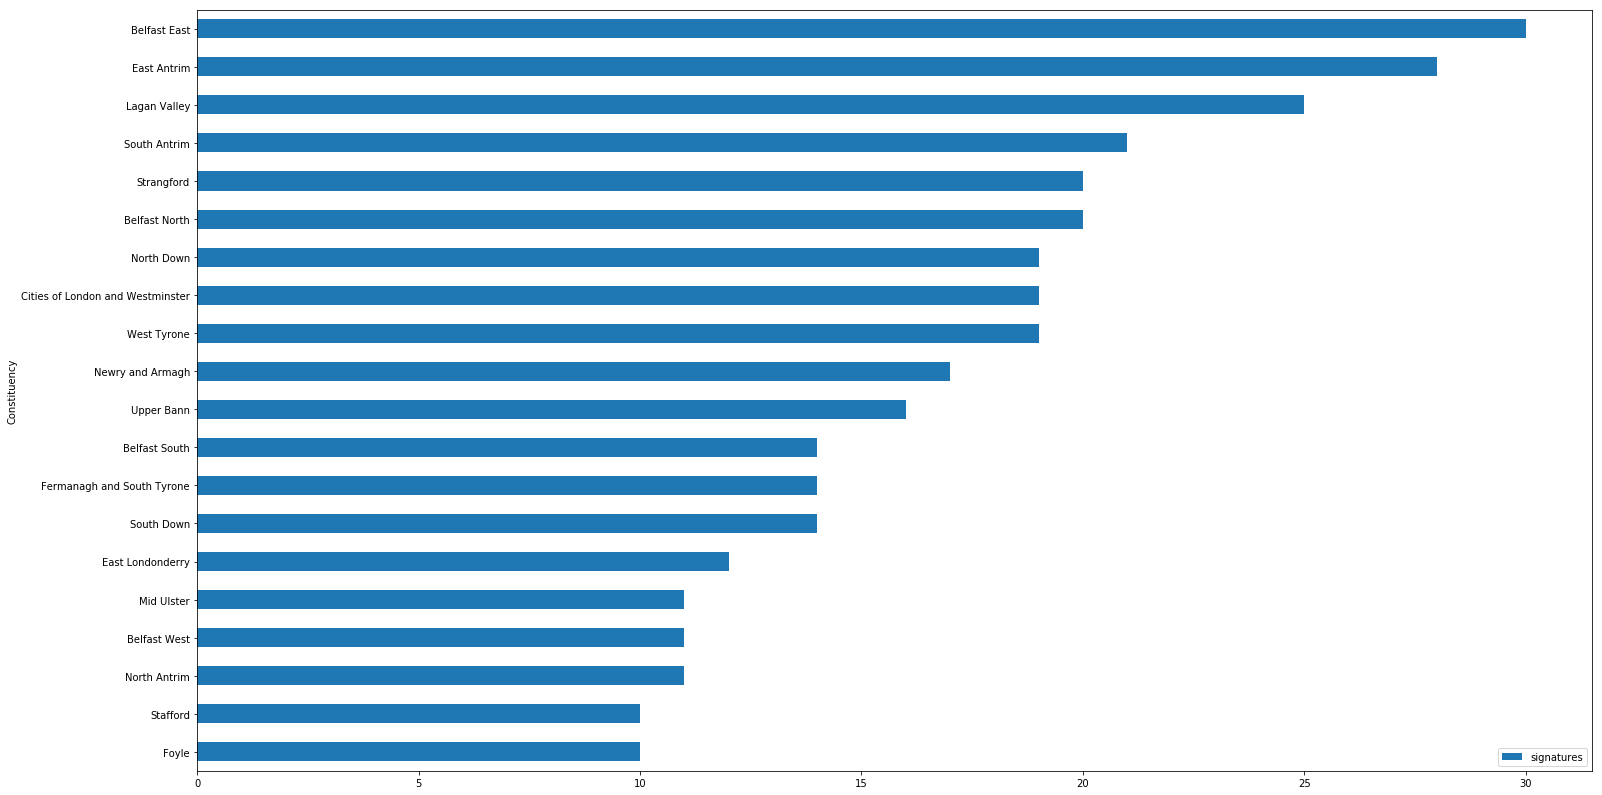

In [43]:
flipped = con_df2.sort_values(by = "signatures", ascending = False).head(20)
flipped2 = flipped.sort_values(by = "signatures", ascending = True)
flipped2.plot(kind = 'barh', figsize = (25, 14))

In [44]:
flipped2.columns

Index(['signatures', 'ons_code', 'mp'], dtype='object')

In [45]:
flipped2.drop('ons_code', axis=1, inplace=True)
flipped2.drop('mp', axis=1, inplace=True)

In [46]:
flipped2.iplot(kind='barh', opacity = 1)

In [ ]:
# NOTE Now GENERATE 'BREXITERS' BEFORE GOING ANY FURTHER

In [ ]:
# **** SCRAPING RESULTS OF BREXIT VOTE IN NIRE *****

In [49]:
# import, pull from url, print 'result', declare pulled as 'soup'

from bs4 import BeautifulSoup as bs
import requests
import re

url = ("https://en.wikipedia.org/wiki/Results_of_the_2016_United_Kingdom_European_Union_membership_referendum#Northern_Ireland")
results = requests.get(url)
print (results)
soup = bs(results.text, 'html.parser')

<Response [200]>


In [50]:
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Results of the 2016 United Kingdom European Union membership referendum - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Results_of_the_2016_United_Kingdom_European_Union_membership_referendum","wgTitle":"Results of the 2016 United Kingdom European Union membership referendum","wgCurRevisionId":879009875,"wgRevisionId":879009875,"wgArticleId":49976215,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages with reference errors","Pages with broken reference names","CS1 maint: Archived copy as title","Use dmy dates from October 2016","All articles la

In [51]:
# how many tables in this page?

len (soup('table'))

62

In [52]:
# select the 18th table from the end

nire = soup.find_all("table")[-18]
print (nire)

<table class="wikitable sortable">
<tbody><tr>
<th rowspan="2">Constituency
</th>
<th rowspan="2">Voter turnout,<br/>of eligible
</th>
<th colspan="2">Votes
</th>
<th colspan="2">Proportion of votes
</th></tr>
<tr>
<th>Remain
</th>
<th>Leave
</th>
<th>Remain
</th>
<th>Leave
</th></tr>
<tr style="background:#acf;">
<td><a href="/wiki/Belfast_East_(UK_Parliament_constituency)" title="Belfast East (UK Parliament constituency)">Belfast East</a></td>
<td>65.8%</td>
<td>20,728</td>
<td><b>21,918</b></td>
<td>48.6%</td>
<td><b>51.4%</b>
</td></tr>
<tr style="background:#fea;">
<td><a href="/wiki/Belfast_North_(UK_Parliament_constituency)" title="Belfast North (UK Parliament constituency)">Belfast North</a></td>
<td>57.5%</td>
<td><b>20,128</b></td>
<td>19,844</td>
<td><b>50.4%</b></td>
<td>49.6%
</td></tr>
<tr style="background:#fea;">
<td><a href="/wiki/Belfast_South_(UK_Parliament_constituency)" title="Belfast South (UK Parliament constituency)">Belfast South</a></td>
<td>67.6%</td>
<td><b>

In [53]:
# how many rows in this selected table?

len (nire("tr"))

20

In [54]:
# declare variable for all the rows found

rows = nire.findAll("tr")
rows

[<tr>
 <th rowspan="2">Constituency
 </th>
 <th rowspan="2">Voter turnout,<br/>of eligible
 </th>
 <th colspan="2">Votes
 </th>
 <th colspan="2">Proportion of votes
 </th></tr>, <tr>
 <th>Remain
 </th>
 <th>Leave
 </th>
 <th>Remain
 </th>
 <th>Leave
 </th></tr>, <tr style="background:#acf;">
 <td><a href="/wiki/Belfast_East_(UK_Parliament_constituency)" title="Belfast East (UK Parliament constituency)">Belfast East</a></td>
 <td>65.8%</td>
 <td>20,728</td>
 <td><b>21,918</b></td>
 <td>48.6%</td>
 <td><b>51.4%</b>
 </td></tr>, <tr style="background:#fea;">
 <td><a href="/wiki/Belfast_North_(UK_Parliament_constituency)" title="Belfast North (UK Parliament constituency)">Belfast North</a></td>
 <td>57.5%</td>
 <td><b>20,128</b></td>
 <td>19,844</td>
 <td><b>50.4%</b></td>
 <td>49.6%
 </td></tr>, <tr style="background:#fea;">
 <td><a href="/wiki/Belfast_South_(UK_Parliament_constituency)" title="Belfast South (UK Parliament constituency)">Belfast South</a></td>
 <td>67.6%</td>
 <td><b>30,9

In [55]:
# cycle through the cells

list_rows = []

for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)

print(clean2)


[West Tyrone, 61.8%, 26,765, 13,274, 66.8%, 33.2%
]


In [56]:
# build pandas df from the rows collected

ni_df = pd.DataFrame(list_rows)
ni_df.head(3)

,0
0,[]
1,[]
2,"[Belfast East, 65.8%, 20,728, 21,918, 48.6%, 5..."


In [57]:
# check what I've built ...

type (ni_df)

pandas.core.frame.DataFrame

In [58]:
# pull out from single column into several columns

nire_df = ni_df[0].str.split(',', expand=True)
nire = pd.DataFrame(nire_df)
nire.head(4)

,0,1,2,3,4,5,6,7
0,[],None,None,None,None,None,None,None
1,[],None,None,None,None,None,None,None
2,[Belfast East,65.8%,20,728,21,918,48.6%,51.4%\n]
3,[Belfast North,57.5%,20,128,19,844,50.4%,49.6%\n]


In [59]:
# check I've got a df

type (nire)

pandas.core.frame.DataFrame

In [60]:
# strip out the odd characters

nire[0] = nire[0].str.strip('[')
nire[7] = nire[7].str.strip(']')
nire[7] = nire[7].str.strip('\n')    

In [61]:
nire.head(4)

,0,1,2,3,4,5,6,7
0,],None,None,None,None,None,None,None
1,],None,None,None,None,None,None,None
2,Belfast East,65.8%,20,728,21,918,48.6%,51.4%
3,Belfast North,57.5%,20,128,19,844,50.4%,49.6%


In [62]:
# drop the first two rows

nire.drop(nire.index[0: 2], inplace=True)
nire

,0,1,2,3,4,5,6,7
2,Belfast East,65.8%,20,728,21,918,48.6%,51.4%
3,Belfast North,57.5%,20,128,19,844,50.4%,49.6%
4,Belfast South,67.6%,30,960,13,596,69.5%,30.5%
5,Belfast West,48.9%,23,099,8,092,74.1%,25.9%
6,East Antrim,65.2%,18,616,22,929,44.8%,55.2%
7,East Londonderry,59.7%,21,098,19,455,52.0%,48.0%
8,Fermanagh and South Tyrone,67.8%,28,200,19,958,58.6%,41.4%
9,Foyle,57.4%,32,064,8,905,78.3%,21.7%
10,Lagan Valley,66.6%,22,710,25,704,46.9%,53.1%
11,Mid Ulster,61.6%,25,612,16,799,60.4%,39.6%


In [63]:
# declare column names

nire.columns = ["Constituency", "Voter_turnout", "Votes_remain_inK", "x", "Votes_leave_inK", "y", "Remain_pc", "Brexit vote (%)"]


In [64]:
# drop two columns by name

nire.drop(['x', 'y'], axis=1, inplace=True)


In [65]:
nire.head(4)

,Constituency,Voter_turnout,Votes_remain_inK,Votes_leave_inK,Remain_pc,Brexit vote (%)
2,Belfast East,65.8%,20,21,48.6%,51.4%
3,Belfast North,57.5%,20,19,50.4%,49.6%
4,Belfast South,67.6%,30,13,69.5%,30.5%
5,Belfast West,48.9%,23,8,74.1%,25.9%


In [66]:
# push 'constituency' column into the index column

nire.set_index("Constituency",drop=True,inplace=True)


In [67]:
nire.head(4)

,Voter_turnout,Votes_remain_inK,Votes_leave_inK,Remain_pc,Brexit vote (%)
Constituency,,,,,
Belfast East,65.8%,20,21,48.6%,51.4%
Belfast North,57.5%,20,19,50.4%,49.6%
Belfast South,67.6%,30,13,69.5%,30.5%
Belfast West,48.9%,23,8,74.1%,25.9%


In [68]:
nire.dtypes

Voter_turnout       object
Votes_remain_inK    object
Votes_leave_inK     object
Remain_pc           object
Brexit vote (%)     object
dtype: object

In [69]:
# changing the 'integers' into real integers

nire.Votes_remain_inK = nire.Votes_remain_inK.astype(int)
nire.Votes_leave_inK = nire.Votes_leave_inK.astype(int)


In [70]:
# check they are now integers

nire.dtypes

Voter_turnout       object
Votes_remain_inK     int64
Votes_leave_inK      int64
Remain_pc           object
Brexit vote (%)     object
dtype: object

In [71]:
# strip out the % sign and convert Brexit vote results from string to float
# this means we can run a coefficient calculation on the two columns

nire["Brexit vote (%)"] = nire["Brexit vote (%)"].str.strip('%')
nire["Brexit vote (%)"] = nire["Brexit vote (%)"].astype(float)
nire["Brexit vote (%)"].dtypes

dtype('float64')

In [72]:
nire.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Belfast East to West Tyrone
Data columns (total 5 columns):
Voter_turnout       18 non-null object
Votes_remain_inK    18 non-null int64
Votes_leave_inK     18 non-null int64
Remain_pc           18 non-null object
Brexit vote (%)     18 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 864.0+ bytes


In [73]:
nire

,Voter_turnout,Votes_remain_inK,Votes_leave_inK,Remain_pc,Brexit vote (%)
Constituency,,,,,
Belfast East,65.8%,20,21,48.6%,51.4
Belfast North,57.5%,20,19,50.4%,49.6
Belfast South,67.6%,30,13,69.5%,30.5
Belfast West,48.9%,23,8,74.1%,25.9
East Antrim,65.2%,18,22,44.8%,55.2
East Londonderry,59.7%,21,19,52.0%,48.0
Fermanagh and South Tyrone,67.8%,28,19,58.6%,41.4
Foyle,57.4%,32,8,78.3%,21.7
Lagan Valley,66.6%,22,25,46.9%,53.1


In [74]:
brexiters = nire.sort_values(by = "Brexit vote (%)", ascending = False)
brexiters

,Voter_turnout,Votes_remain_inK,Votes_leave_inK,Remain_pc,Brexit vote (%)
Constituency,,,,,
North Antrim,64.9%,18,30,37.8%,62.2
Strangford,64.5%,18,23,44.5%,55.5
East Antrim,65.2%,18,22,44.8%,55.2
Lagan Valley,66.6%,22,25,46.9%,53.1
Upper Bann,63.6%,24,27,47.4%,52.6
Belfast East,65.8%,20,21,48.6%,51.4
South Antrim,63.1%,21,22,49.4%,50.6
Belfast North,57.5%,20,19,50.4%,49.6
East Londonderry,59.7%,21,19,52.0%,48.0


In [ ]:
# ****NOW BACK TO THE GRAPHING

In [78]:
#flipped2

both = pd.concat([flipped2, brexiters], axis = 1, sort = True)
both.fillna("NA")
both_final = both[['signatures', 'Brexit vote (%)']].sort_values(by = "signatures", ascending = True)
both_final


,signatures,Brexit vote (%)
Foyle,10,21.7
Stafford,10,NaN
Belfast West,11,25.9
Mid Ulster,11,39.6
North Antrim,11,62.2
East Londonderry,12,48.0
Belfast South,14,30.5
Fermanagh and South Tyrone,14,41.4
South Down,14,32.8
Upper Bann,16,52.6


In [79]:
both_final.signatures.iplot(kind='barh', opacity = 1)

In [ ]:
# checking for correlation between brexit support and signatures




In [80]:
# calculate the 0 - 1 correlation value for the two columns

both_final['signatures'].corr(both_final['Brexit vote (%)'])

0.510281551770769

In [81]:
# pull a selection of just those constituencies that voted Leave

out = both_final[both_final['Brexit vote (%)'] > 50]
out

,signatures,Brexit vote (%)
North Antrim,11,62.2
Upper Bann,16,52.6
Strangford,20,55.5
South Antrim,21,50.6
Lagan Valley,25,53.1
East Antrim,28,55.2
Belfast East,30,51.4


In [82]:
# with just Leave constituencies the corr is higher, but is negative
# presumably because a 62% vote has only 11 signatures suggesting (erroneously) 'more votes, fewer signatures'

out['signatures'].corr(out['Brexit vote (%)'])

-0.6163263349062442

In [83]:
out_test = out[out['signatures']>17]
out_test
#out = both_final[both_final['Brexit vote (%)'] > 50]

,signatures,Brexit vote (%)
Strangford,20,55.5
South Antrim,21,50.6
Lagan Valley,25,53.1
East Antrim,28,55.2
Belfast East,30,51.4


In [84]:
# this only suggests a very weak correlation however, and still negative
# negative because 51% gives 30 sigs, while 55% gives 20 sigs.

out_test['signatures'].corr(out_test['Brexit vote (%)'])

-0.10898354126137373

In [87]:
brexiters['Brexit vote (%)']

# here, for comparaison

Constituency
North Antrim                  62.2
Strangford                    55.5
East Antrim                   55.2
Lagan Valley                  53.1
Upper Bann                    52.6
Belfast East                  51.4
South Antrim                  50.6
Belfast North                 49.6
East Londonderry              48.0
North Down                    47.6
Fermanagh and South Tyrone    41.4
Mid Ulster                    39.6
Newry and Armagh              36.9
West Tyrone                   33.2
South Down                    32.8
Belfast South                 30.5
Belfast West                  25.9
Foyle                         21.7
Name: Brexit vote (%), dtype: float64

In [ ]:
# test scrape on the petition page

In [75]:
url = ("https://petition.parliament.uk/petitions/235821")
results = requests.get(url)
print (results)


<Response [404]>


In [76]:
soup = bs(results.text, 'html.parser')

In [77]:
soup

<!DOCTYPE html>

<html lang="en-GB">
<!-- This file lives in public/404.html -->
<head>
<title>The page you're looking for doesn’t exist (error 404)</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
  new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
  j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
  'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
  })(window,document,'script','dataLayer','GTM-MQJ6XZ5');</script>
<!-- End Google Tag Manager -->
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<link href="/error.css" media="screen" rel="stylesheet"/>
</head>
<body>
<!-- Google Tag Manager (noscript) -->
<noscript><iframe height="0" src="https://www.googletagmanager.com/ns.html?id=GTM-MQJ6XZ5" style="display:none;visibility:hidden" width="0"></iframe></noscript>
<!-- 